In [1]:
!nvidia-smi

Sun Jun 22 09:42:15 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 555.42.02              Driver Version: 555.42.02      CUDA Version: 12.5     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA L40S                    On  |   00000000:99:00.0 Off |                    0 |
| N/A   31C    P8             31W /  350W |       1MiB /  46068MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [7]:
import os
from PIL import Image
from utils import *
import torch
from diffusers import StableDiffusionPipeline

device = "cuda:0"

/home/minhthan001/.conda/envs/myenv2/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Load Stable Diffusion

In [8]:
pipe = StableDiffusionPipeline.from_pretrained(
    "CompVis/stable-diffusion-v1-4", 
    torch_dtype=torch.float16
)
print("[INFO] Successfully loaded Stable Diffusion!")

Loading pipeline components...:  14%|████▏                        | 1/7 [00:00<00:01,  3.98it/s]/home/minhthan001/.conda/envs/myenv2/lib/python3.8/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Loading pipeline components...: 100%|█████████████████████████████| 7/7 [00:02<00:00,  3.37it/s]


[INFO] Successfully loaded Stable Diffusion!


### Load LoRA weights

In [9]:
# lora_path = "./runs/sd-naruto-model-lora"
# lora_path = "./runs/artistic_custom"
lora_path = "./runs/dreambooth_cat"
# lora_path = None  # if not using LoRA

if lora_path is not None:
    pipe.load_lora_weights(lora_path)
    print("[INFO] Successfully loaded LoRA weights!")
    
pipe = pipe.to(device)

[INFO] Successfully loaded LoRA weights!


### Inference

100%|███████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 40.63it/s]


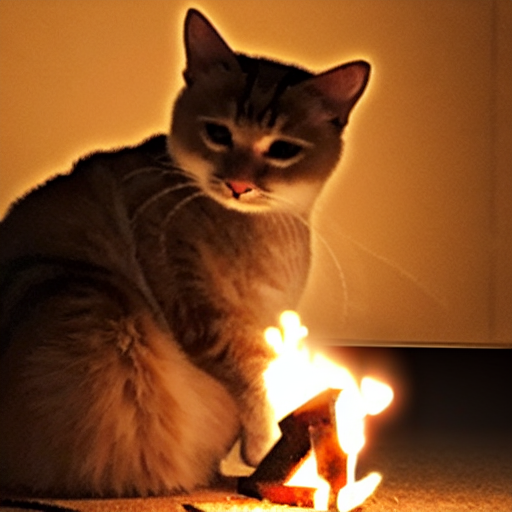

In [29]:
prompt = "A photo of sks cat playing with fire"

seed = 10

seed_everything(seed)

image = pipe(
    prompt, 
    num_inference_steps=30, 
    guidance_scale=7.5
).images[0]

image